In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic' #sns 한글화
# https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9

In [3]:
df = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/train.csv')
df_test = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/test.csv')

In [4]:
df.info() #각 칼럼의 상관관계를 분석해보자. object -> int 변환이 필수적이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [5]:
#조식, 중식, 석식 메뉴 삭제
인트만 = df.drop(labels= '조식메뉴', axis=1)
인트만 = 인트만.drop(labels= '중식메뉴', axis=1)
인트만 = 인트만.drop(labels= '석식메뉴', axis=1)

In [6]:
인트만.info() #일자와 요일이 object다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   중식계             1205 non-null   float64
 8   석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 84.9+ KB


In [7]:
#corr을 위해 일자를 int로 변환하자.
#인트 변환 전, datatime으로 변환
인트만['일자']= pd.to_datetime(인트만['일자'])

In [8]:
인트만.info() #datatime64 변환완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   중식계             1205 non-null   float64       
 8   석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 84.9+ KB


In [9]:
인트만['연도'] = 인트만['일자'].dt.year
인트만['월'] = 인트만['일자'].dt.month
인트만['일'] = 인트만['일자'].dt.day

# https://bigdaheta.tistory.com/16

In [10]:
인트만

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0,2021,1,20
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0,2021,1,21
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0,2021,1,22
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0,2021,1,25


In [11]:
인트만 = 인트만.drop(['일자'], axis=1)
#이유는 모르겠으나 레이블을 안쓰고, 요런식으로 쓰니 ... 오오,..

In [12]:
# 요일제외인트만 = 인트만.drop(['일자'], axis=1)

In [13]:
인트만

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일
0,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1
1,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2
2,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3
3,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4
4,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...
1200,수,2983,75,198,4,391.0,1093.0,421.0,2021,1,20
1201,목,2983,92,231,462,351.0,832.0,353.0,2021,1,21
1202,금,2983,255,248,1,303.0,579.0,217.0,2021,1,22
1203,월,2983,107,153,616,327.0,1145.0,502.0,2021,1,25


In [14]:
# input_labels = ['월', '화','수', '목','금']

cols = 인트만.select_dtypes(include='object').columns
for col in cols:
    le = LabelEncoder()
    인트만[col] = le.fit_transform(인트만[col])

In [15]:
인트만

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일
0,3,2601,50,150,238,0.0,1039.0,331.0,2016,2,1
1,4,2601,50,173,319,0.0,867.0,560.0,2016,2,2
2,2,2601,56,180,111,0.0,1017.0,573.0,2016,2,3
3,1,2601,104,220,355,0.0,978.0,525.0,2016,2,4
4,0,2601,278,181,34,0.0,925.0,330.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...
1200,2,2983,75,198,4,391.0,1093.0,421.0,2021,1,20
1201,1,2983,92,231,462,351.0,832.0,353.0,2021,1,21
1202,0,2983,255,248,1,303.0,579.0,217.0,2021,1,22
1203,3,2983,107,153,616,327.0,1145.0,502.0,2021,1,25


In [16]:
co_only_int = 인트만.corr()

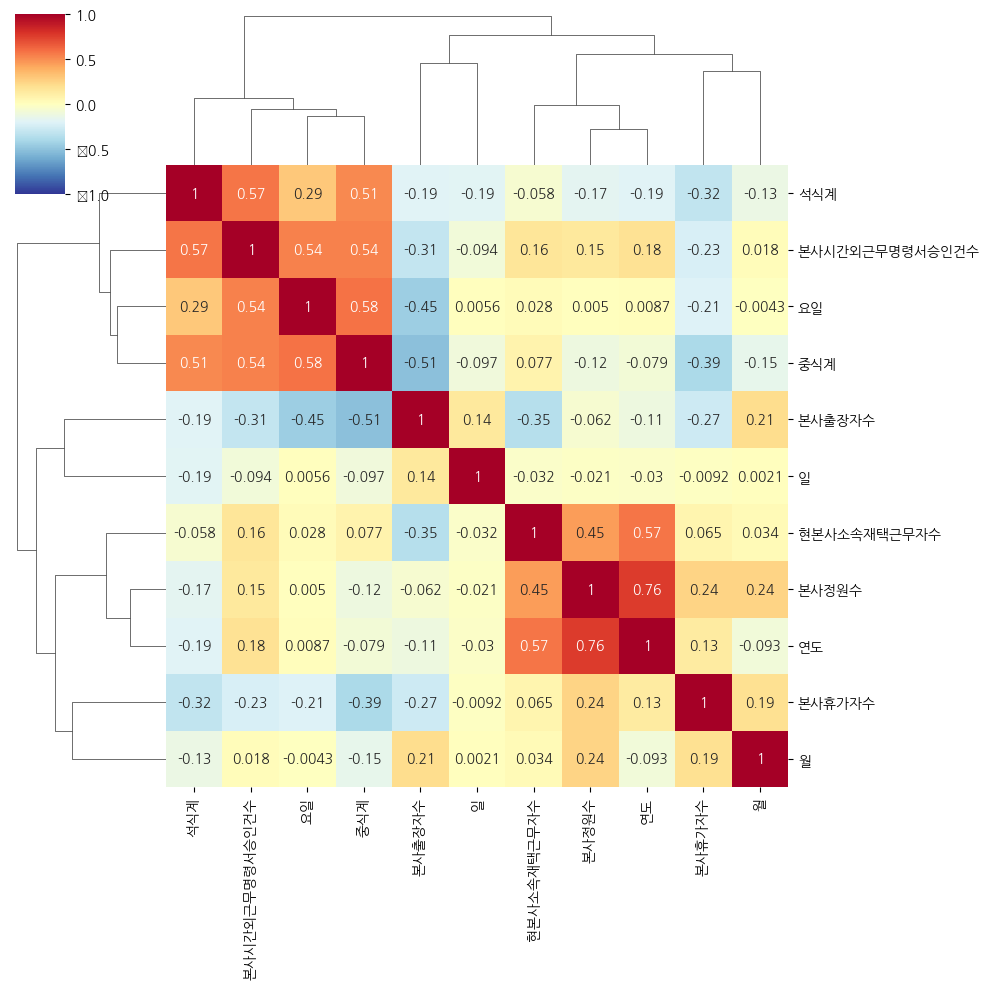

In [17]:
sns.clustermap(co_only_int, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

# 양의 상관관계
# 석식 - 근무명령서 승인건수 = 0.57
# 중식 - 석식= 0.51
# 요일 - 중식 = 0.58
# 중식 - 근무명령서 승인건수 = 0.54

# 음의 상관관계
# 본사출장자수 - 중식 = -0.51
# 본사휴가자수 - 중식 = 0.39

# 본사 정원수 - 현본사재택근무자수 = 0.57
# 본사 정원수 - 연도 = 0.76

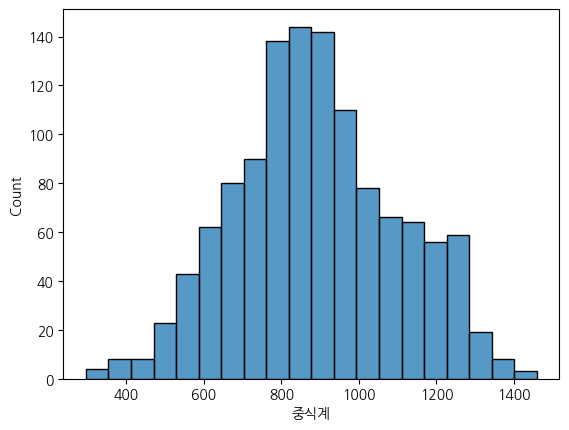

In [18]:
sns.histplot(인트만['중식계'], bins=20)
plt.show()

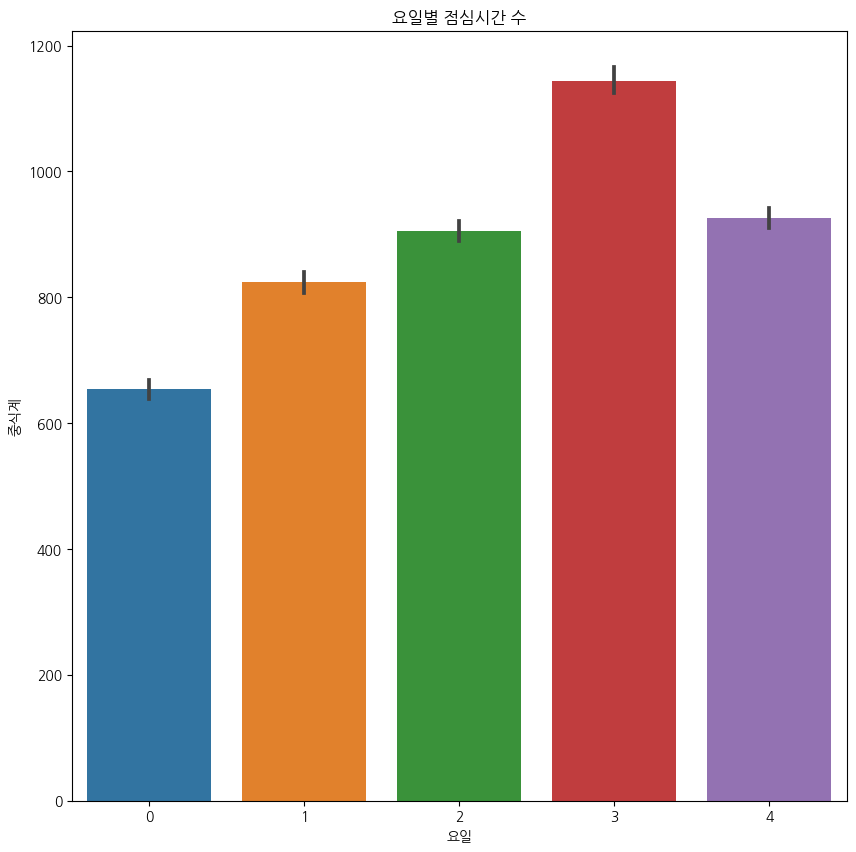

In [19]:
plt.figure(figsize=(10,10))


sns.barplot(x="요일", y="중식계", data=인트만)
plt.title("요일별 점심시간 수")
plt.show()

#레이블인코딩이 가나다 순서로 되어서 월화수목금이 01234 가 아니란 것을 깨달음.. ㅋㅋㅋㅋㅋㅋㅋ

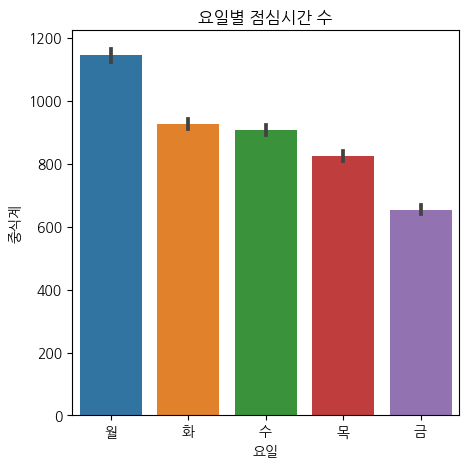

In [20]:
plt.figure(figsize=(5,5))


sns.barplot(x="요일", y="중식계", data=df)
# sns.barplot(x="요일", y="중식계", data=df)
plt.title("요일별 점심시간 수")
plt.show()

#요일에 있는 중식계를 자동으로 평균내어주는 것인가.. 월요일은 한 개가 아니라 수십개의 월요일이 있거늘,. 어찌 하나의 막대로 탄생된단 말인가!

In [21]:
#요일별 평균 직접 내보기.. 두둥..

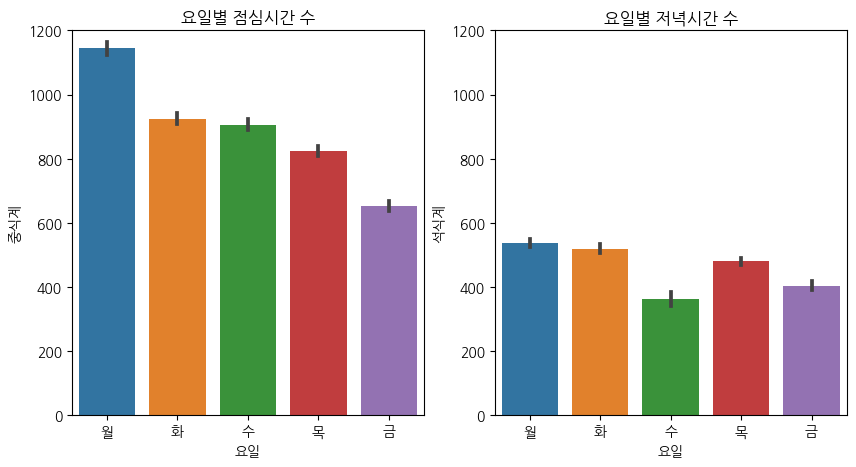

In [22]:
# x123123 = np.linspace(0.0, 4.0)
# x2 = np.linspace(0.0, 4.0)
# y = np.linspace(0.0, 1200.0)
# y2 = np.linspace(0.0, 1200.0)

# fig, ax = plt.subplots()
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.ylim((0,1200)) # https://wikidocs.net/92082 헐... y축..
sns.barplot(x="요일", y="중식계", data=df)
# ax.set_ylim(0, 1200)
plt.title("요일별 점심시간 수")

plt.subplot(1, 2, 2)
plt.ylim((0,1200)) # https://wikidocs.net/92082 헐... y축..
sns.barplot(x="요일", y="석식계" , data=df)
plt.title("요일별 저녁시간 수")


plt.show()



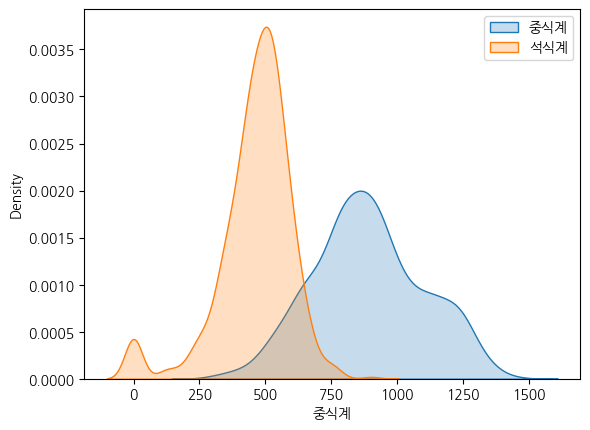

In [23]:
sns.kdeplot(df['중식계'], label='중식계', shade=True)
sns.kdeplot(df['석식계'], label='석식계',shade=True)
plt.legend()
plt.show()

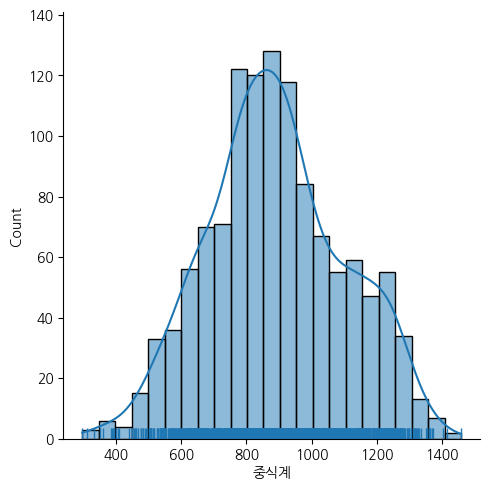

In [29]:
sns.displot(data=df['중식계'], kde=True, rug=True) #rug = 개수 시각화, kde=라인여부

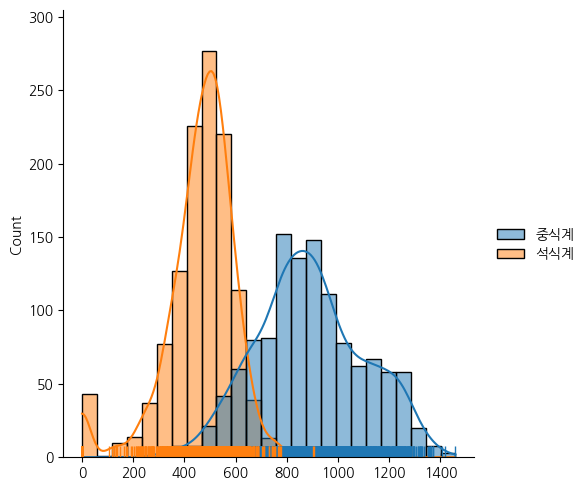

In [35]:
sns.displot(data=df[['중식계', '석식계']], kde=True, rug=True)
# sns.displot(data=df['석식계'], kde=True, color='blue') 

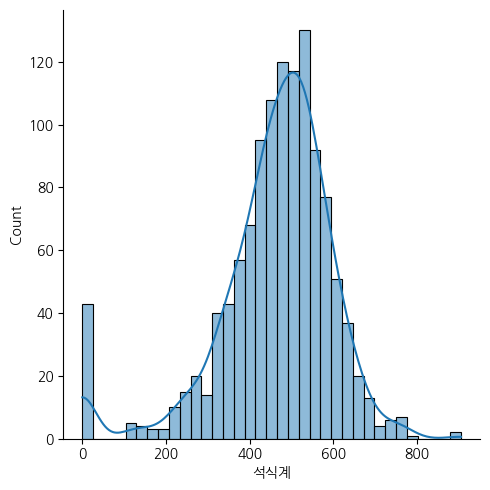

In [28]:
sns.displot(data=df['석식계'], kde=True)
sns.displot(data=df['석식계'], kde=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


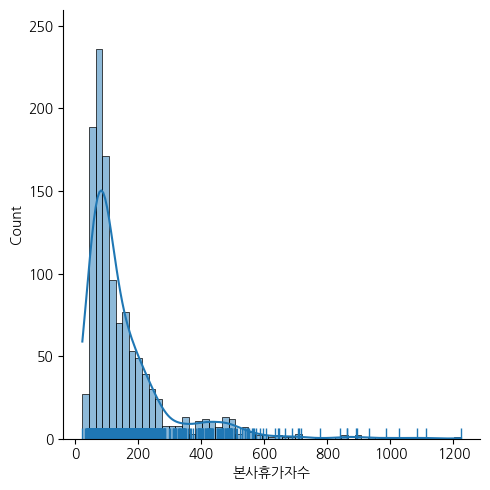

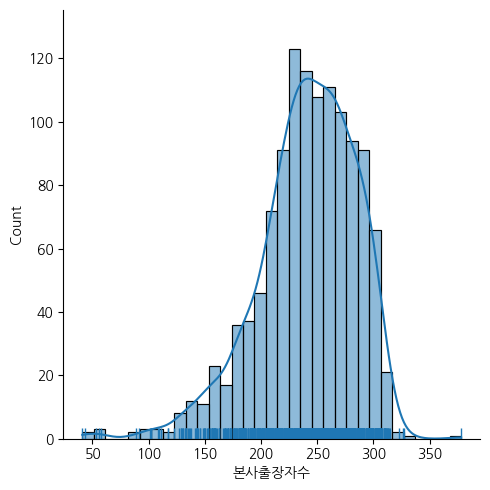

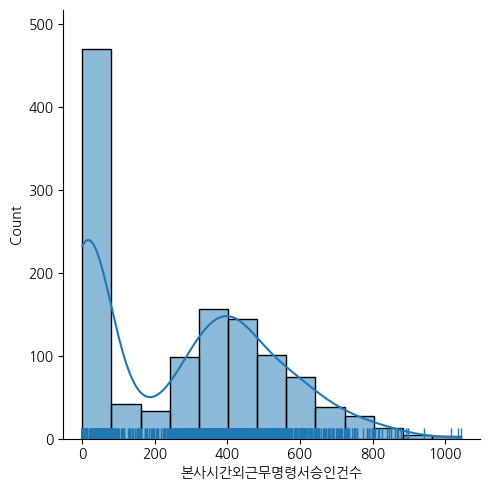

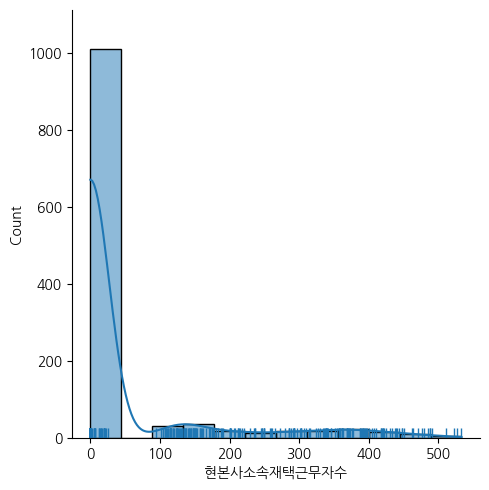

In [39]:
# sns.kdeplot(df['본사정원수'], shade=True)

ax = sns.displot(data=df['본사휴가자수'], kde=True, rug=True)
ax = sns.displot(data=df['본사출장자수'], kde=True, rug=True)
ax = sns.displot(data=df['본사시간외근무명령서승인건수'], kde=True, rug=True)
ax = sns.displot(data=df['현본사소속재택근무자수'], kde=True, rug=True)
